In [152]:
import csv
import datetime as dt
import requests as r

In [153]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url) ##requisição guardada em uma variável

In [154]:
resp.status_code ##verificando status

200

In [155]:
raw_data = resp.json()

In [156]:
raw_data[0] ## leitura de dados na linha 0

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [157]:
final_data = []
for obs in raw_data: ## Filtragem dos dados
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [158]:
## Inserção de rótulos
final_data.insert(0, ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'])

In [159]:
CON = 0
DEA = 1
REC = 2
ATI = 3
DAT = 4

final_data[1][4]

'2020-02-26T00:00:00Z'

In [160]:
##Formatando a data

for i in range(1, len(final_data)):
    final_data[i][DAT] = final_data[i][DAT][:10]
for i in range(1, len(final_data)):
    final_data[i][DAT] = dt.datetime.strptime(final_data[i][DAT], '%Y-%m-%d')

In [161]:
with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [162]:
final_data

[['Confirmed', 'Deaths', 'Recovered', 'Active', 'Date'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.dateti

In [163]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i]
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [164]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [165]:
def create_chart(x, y, labels, kind = 'bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    
    return chart

In [172]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [173]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [174]:
from PIL import Image
from IPython.display import display

In [177]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

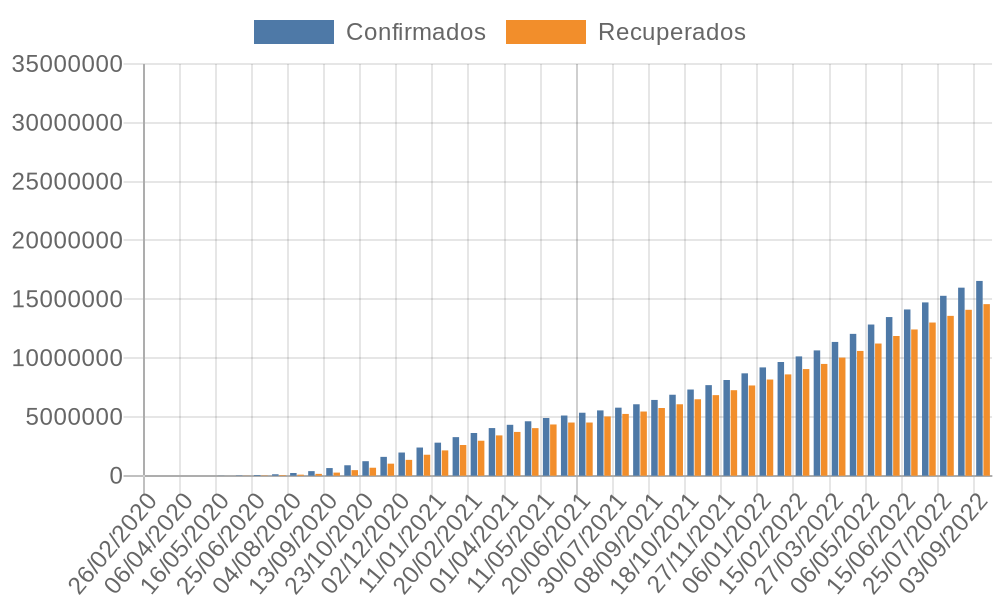

In [211]:
y_data_1 = []
for obs in final_data[1::10]:
    y_data_1.append(obs[CON])

y_data_2 = []
for obs in final_data[1::10]:
    y_data_2.append(obs[REC])
    
x = []
for obs in final_data[1::20]:
    x.append(obs[DAT].strftime('%d/%m/%Y'))

labels = ['Confirmados', 'Recuperados']
chart = create_chart(x, [y_data_1, y_data_2], labels, title='Confirmed vs Recovered')
chart_content = get_api_chart(chart)
save_image('first-graph.png', chart_content)
display_image('first-graph.png')


In [212]:
from urllib.parse import quote
def get_api_qrcode(link):
    text = quote(link)
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

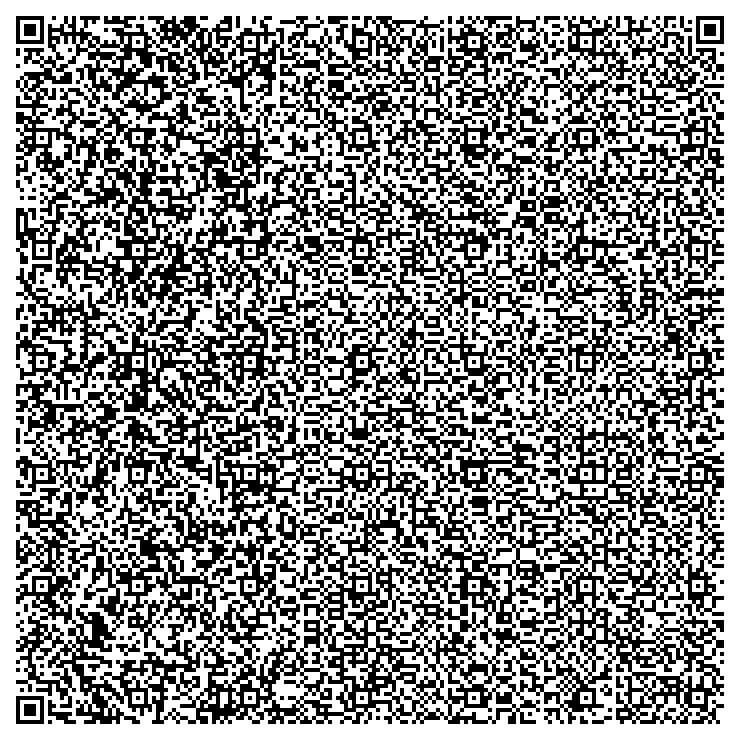

In [213]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')